In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import api_key
from sklearn import preprocessing

#api_key = "4a60fcfe3a762ea4e4d9276f8944aa76"

In [2]:
# Total Petroleum and Other Liquids Product Supplied, Annual data
# URL for GET requests to retrieve Total Petroleum and Other Liquids Product Supplied, Annual data
petroleum_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCPUSX.A"

In [3]:
# Print the response object to the console
print(requests.get(petroleum_url))

<Response [200]>


In [4]:
# Pretty Print the output of the JSON
response = requests.get(petroleum_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.PATCPUSX.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          21.030747596
        ],
        [
          "2019",
          20.809694225
        ],
        [
          "2018",
          20.452870184
        ],
        [
          "2017",
          19.957716775
        ],
        [
          "2016",
          19.687234932
        ],
        [
          "2015",
          19.533503173
        ],
        [
          "2014",
          19.100073868
        ],
        [
          "2013",
          18.966859773
        ],
        [
          "2012",
          18.486649451
        ],
        [
          "2011",
          18.886687718
        ],
        [
          "2010",
          19.180113847
        ],
        [
          "2009",
          18.771391049
        ],
        [
          "2008",
          19.497954475
        ],
        [
          "2007",
          20.68036892

In [5]:
# Create variables and set them as Lists
years = []
petroleum_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    petroleum_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
petroleum = petroleum_consumption[::-1]

In [6]:
# Create a For Loop to calculate the annual percent change for Petroleum
i = 0
percent_change_petro = []
for x in petroleum:
    if(i == 0):
        percent_change_petro.append(0)
    else:
        percent_change_petro.append( (x - petroleum[i-1])/ petroleum[i-1] * 100)
    i += 1

In [7]:
# Use Pandas to create a DataFrame displaying the annual percent change per year
petroleum_consumption_mmbpd_df = pd.DataFrame({
    'Year': years,
    'Oil (mmbpd)': petroleum,
    '% Change': percent_change_petro
})
petroleum_consumption_mmbpd_df.head()

,Year,Oil (mmbpd),% Change
0,1990,16.989137,0.000000
1,1991,16.713847,-1.620390
2,1992,17.032224,1.904872
3,1993,17.236999,1.202279
4,1994,17.718979,2.796196


In [8]:
# Calculate the Average Change over thirty years of consumption data
petroleum_consumption_mmbpd_df.mean()

Year           6.419997e+121
Oil (mmbpd)     1.919965e+01
% Change        7.112290e-01
dtype: float64

In [9]:
# Taking a closer look at the data...
# Calculate lowest and highest consumption levels for petroleum and other liquid fuels
min_consumption_value = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].min()
min_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["Oil (mmbpd)"]==min_consumption_value].Year)
max_consumption_value = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].max()
max_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["Oil (mmbpd)"]==max_consumption_value].Year)
print(f"The least amount of oil consumed in the US was in {int(min_consumption_year)} with {min_consumption_value} million barrels per day.")
print(f"{int(max_consumption_year)} is projected to have the highest level of petroleum consumption at approximately {max_consumption_value} million barrels per day.")

# Calculate the greatest percent increase and decrease in petroleum consumption
max_petro_consumption_delta= petroleum_consumption_mmbpd_df["% Change"].max()
max_petro_consumption_year= int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["% Change"]==max_petro_consumption_delta].Year)
min_petro_consumption_delta = petroleum_consumption_mmbpd_df["% Change"].min()
min_petro_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["% Change"]==min_petro_consumption_delta].Year)
print(f"The greatest percent increase in U.S. Energy Consumption of petroleum was {max_petro_consumption_delta}% in {max_petro_consumption_year}.")
print(f"The greatest percent decrease in U.S. Energy Consumption of petroleum was {min_petro_consumption_delta}% in {min_petro_consumption_year}.")


# Calculate the total petroleum and other liquid consumption over the last thirty years
petroleum_total_consumption = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].mean()
print(f"The U.S. has consumed an average of {petroleum_total_consumption} million barrels per day over the last thirty years.")

# Calculate the total petroleum and other liquid fuel consumption
petroleum_total_consumption = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].sum() 

print(f"The U.S. has consumed a total of {petroleum_total_consumption} million barrels per day over the last thirty years.")

# Calculate the difference between highest and lowest petroleum consumption level
petroleum_greatestchange = (max_consumption_value - min_consumption_value)
print(f"The largest difference in total petroleum consumption from 1990 and 2020 is {petroleum_greatestchange} million barrels per day.")

The least amount of oil consumed in the US was in 1991 with 16.713846896 million barrels per day.
2020 is projected to have the highest level of petroleum consumption at approximately 21.030747596 million barrels per day.
The greatest percent increase in U.S. Energy Consumption of petroleum was 3.481809794851699% in 2004.
The greatest percent decrease in U.S. Energy Consumption of petroleum was -5.717569403702996% in 2008.
The U.S. has consumed an average of 19.199648892709675 million barrels per day over the last thirty years.
The U.S. has consumed a total of 595.1891156739999 million barrels per day over the last thirty years.
The largest difference in total petroleum consumption from 1990 and 2020 is 4.3169007000000015 million barrels per day.


In [10]:
#  Export file as a CSV, without the Pandas index, but with the header
petroleum_consumption_mmbpd_df.to_csv("resources/PetroleumConsumption.csv", index=True, header=True)

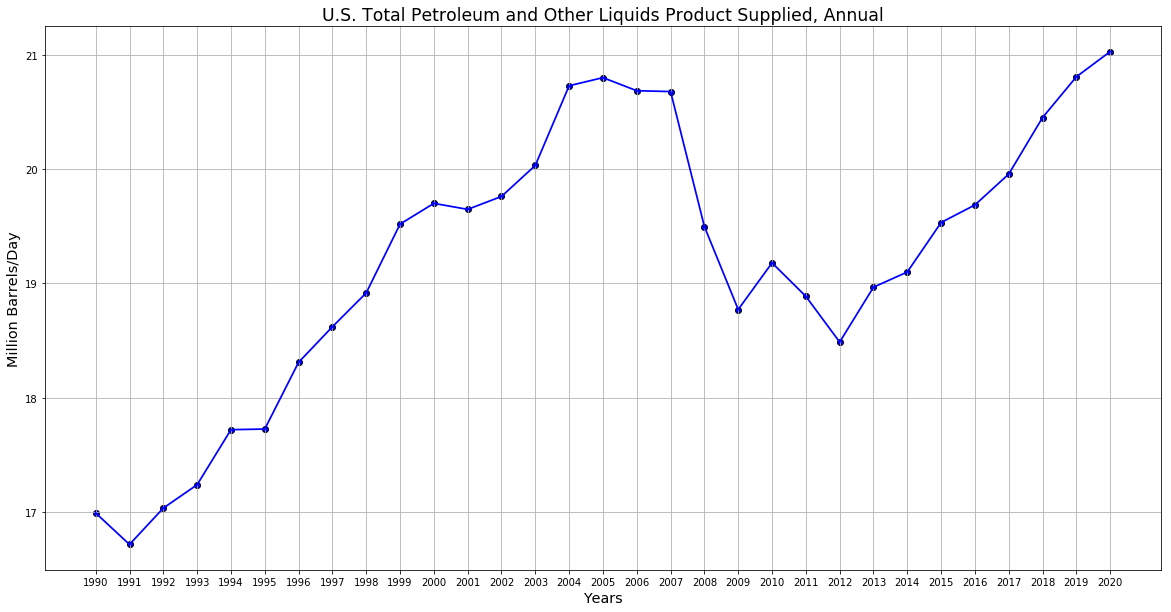

The least amount of oil consumed in the US was in 1991 with 16.713846896 million barrels per day.
2020 is projected to have the highest level of petroleum consumption at approximately 21.030747596 million barrels per day.


In [11]:
# Configure plot size for Total Petroleum and Other Liquids Product Supplied, Annual
plt.figure(figsize=(20,10))

# Create a visual trend for the data
plt.scatter(years, petroleum, color="blue", edgecolors="black")
plt.plot(years, petroleum, linewidth=1.75, color="blue")
plt.title("U.S. Total Petroleum and Other Liquids Product Supplied, Annual", fontsize="xx-large")
plt.ylabel("Million Barrels/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Petroleum Consumption.png")

# display the figure
plt.show()

# Print the lowest and highest consumption levels for petroleum and other liquid fuels
print(f"The least amount of oil consumed in the US was in {int(min_consumption_year)} with {min_consumption_value} million barrels per day.")
print(f"{int(max_consumption_year)} is projected to have the highest level of petroleum consumption at approximately {max_consumption_value} million barrels per day.")


In [12]:
# US Natural Gas Consumption, Annual
# URL for GET requests to retrieve
natural_gas_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCPUS.A"

In [13]:
# Print the response object to the console
print(requests.get(natural_gas_url))

<Response [200]>


In [14]:
# Pretty Print the output of the JSON
response = requests.get(natural_gas_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.NGTCPUS.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          83.678454563
        ],
        [
          "2019",
          83.565551423
        ],
        [
          "2018",
          82.061451205
        ],
        [
          "2017",
          74.317059965
        ],
        [
          "2016",
          74.984128506
        ],
        [
          "2015",
          74.640616866
        ],
        [
          "2014",
          72.858455003
        ],
        [
          "2013",
          71.657648115
        ],
        [
          "2012",
          69.777203531
        ],
        [
          "2011",
          67.061342888
        ],
        [
          "2010",
          65.991140718
        ],
        [
          "2009",
          62.767243771
        ],
        [
          "2008",
          63.598285935
        ],
        [
          "2007",
          63.297987197

In [15]:
# US Natural Gas Consumption, Annual
# Create variables and set them as Lists
years = []
natural_gas_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    natural_gas_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
natural_gas = natural_gas_consumption[::-1]

In [16]:
# Create a For Loop to calculate the annual percent change for Natural Gas
i = 0
percent_change_natgas = []
for x in natural_gas:
    if(i == 0):
        percent_change_natgas.append(0)
    else:
        percent_change_natgas.append( (x - natural_gas[i-1])/ natural_gas[i-1] * 100)
    i += 1

In [17]:
# Use Pandas to create a DataFrame displaying the annual percent change per year
ng_consumption_bcf_df = pd.DataFrame({
    'Year': years,
    'NG (bcf/day)': natural_gas,
    '% Change': percent_change_natgas
})
ng_consumption_bcf_df.set_index("Year").head()

,NG (bcf/day),% Change
Year,,
1990,52.530288,0.000000
1991,53.594703,2.026289
1992,55.268382,3.122845
1993,56.958472,3.057969
1994,58.211229,2.199421


In [18]:
# calculate average percent change over thirty years of consumption data
ng_consumption_bcf_df.mean()

Year            6.419997e+121
NG (bcf/day)     6.528508e+01
% Change         1.554474e+00
dtype: float64

In [19]:
# Taking a closer look at the data...
# Calculate highest and lowest consumption levels for natural gas
min_ngconsumption_value = ng_consumption_bcf_df["NG (bcf/day)"].min()
min_ngconsumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["NG (bcf/day)"]==min_ngconsumption_value].Year)
max_ngconsumption_value = ng_consumption_bcf_df["NG (bcf/day)"].max()
max_ngconsumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["NG (bcf/day)"]==max_ngconsumption_value].Year)

print(f"The least amount of natural gas consumed in the U.S. was in {int(min_ngconsumption_year)} with {min_ngconsumption_value} billion cubic feet per day.")
print(f"{int(max_ngconsumption_year)} is projected to have the highest level of natural gas consumption at approximately {max_ngconsumption_value} billion cubic feet/day.")

# Calculate the greatest percent increase and decrease in natural gas consumption consumption
max_ng_consumption_delta= ng_consumption_bcf_df["% Change"].max()
max_ng_consumption_year= int(ng_consumption_bcf_df[ng_consumption_bcf_df["% Change"]==max_ng_consumption_delta].Year)
min_ng_consumption_delta = ng_consumption_bcf_df["% Change"].min()
min_ng_consumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["% Change"]==min_ng_consumption_delta].Year)

print(f"The greatest percent increase in U.S. Energy Consumption of natural gas was {max_ng_consumption_delta}% in {max_ng_consumption_year}.")
print(f"The greatest percent decrease in U.S. Energy Consumption of natural gas was {min_ng_consumption_delta}% in {min_ng_consumption_year}.")

# Calculate the average natural gas consumption over the last thirty years
ng_total_consumption = ng_consumption_bcf_df["NG (bcf/day)"].mean()
print(f"The U.S. has consumed an average of {ng_total_consumption} billion cubic feet/day over the last thirty years.")


The least amount of natural gas consumed in the US was in 1990 with 52.530287689 billion cubic feet per day.
2020 is projected to have the highest level of natural gas consumption at approximately 83.678454563 billion cubic feet/day.
The greatest percent increase in US Energy Consumption of natural gas was 10.420744905203811% in 2018.
The greatest percent decrease in US Energy Consumption of natural gas was -4.438370577246055% in 2001.
The US has consumed an average of 65.28508049874192 billion cubic feet/day over the last thirty years.


In [20]:
#  Export file as a CSV, without the Pandas index, but with the header
ng_consumption_bcf_df.to_csv("resources/NaturalGasConsumption.csv", index=False, header=True)

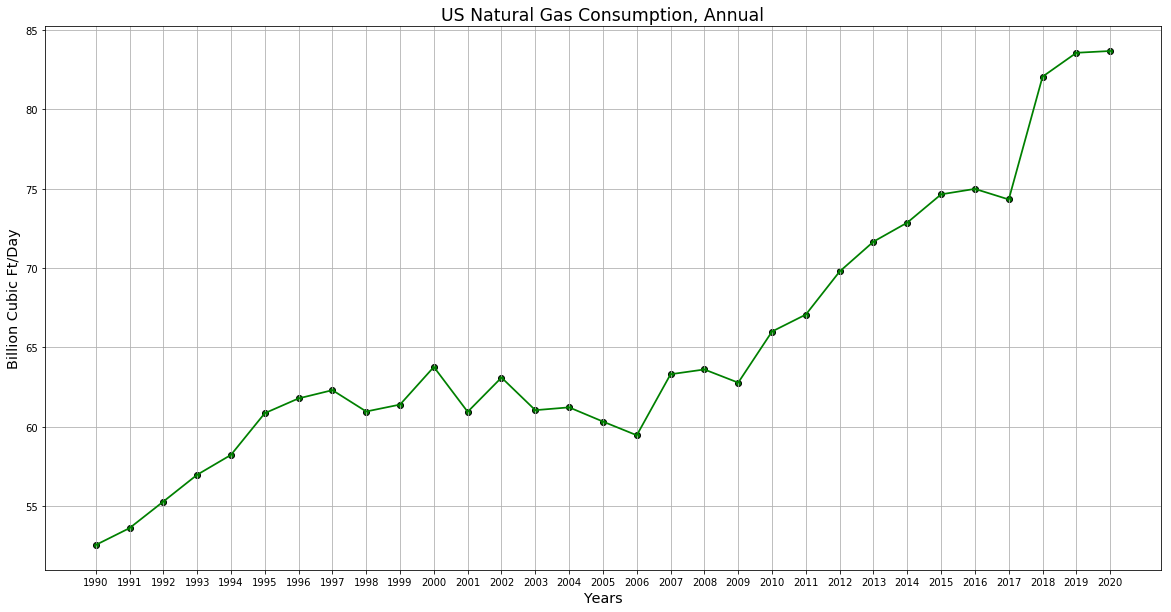

The least amount of natural gas consumed in the US was in 1990 with 52.530287689 billion cubic feet per day.
2020 is projected to have the highest level of natural gas consumption at approximately 83.678454563 billion cubic feet/day.


In [21]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, natural_gas, color="green", edgecolors="black")
plt.plot(years, natural_gas, linewidth=1.75, color="green")
plt.title("U.S. Natural Gas Consumption, Annual", fontsize="xx-large")
plt.ylabel("Billion Cubic Ft/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Natural Gas Consumption.png")

# Display the figure
plt.show()

# Print the highest and lowest consumption levels for natural gas
print(f"The least amount of natural gas consumed in the U.S. was in {int(min_ngconsumption_year)} with {min_ngconsumption_value} billion cubic feet per day.")
print(f"{int(max_ngconsumption_year)} is projected to have the highest level of natural gas consumption at approximately {max_ngconsumption_value} billion cubic feet/day.")


In [22]:
# U.S. Total Coal Supply, Annual
# URL for GET requests to retrieve U.S. Total Coal Supply, Annually
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"

In [23]:
# Print the response object to the console
print(requests.get(coal_url))

<Response [200]>


In [24]:
# Pretty Print the output of the JSON
response = requests.get(coal_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.CLTSPUS_TON.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          585.18649
        ],
        [
          "2019",
          609.226738
        ],
        [
          "2018",
          689.19294963
        ],
        [
          "2017",
          721.41797597
        ],
        [
          "2016",
          733.519456
        ],
        [
          "2015",
          803.56624798
        ],
        [
          "2014",
          928.83286904
        ],
        [
          "2013",
          925.89304602
        ],
        [
          "2012",
          904.16558998
        ],
        [
          "2011",
          1014.4545341
        ],
        [
          "2010",
          1048.695744
        ],
        [
          "2009",
          1012.462846
        ],
        [
          "2008",
          1126.288328
        ],
        [
          "2007",
          1132.083565
      

In [25]:
# US Total Coal Supply, Annual
# Create variables and set them as Lists
years = []
coal_supply = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    coal_supply.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
coal = coal_supply[::-1]

In [26]:
# Create a For Loop to calculate the annual percent change for Natural Gas
i = 0
percent_change_coal = []
for x in coal:
    if(i == 0):
        percent_change_coal.append(0)
    else:
        percent_change_coal.append( (x - coal[i-1])/ coal[i-1] * 100)
    i += 1

In [27]:
# Use Pandas to create a DataFrame displaying the annual percent change per year
coal_consumption_mst_df = pd.DataFrame({
    'Year': years,
    'coal (MMSt)': coal,
    '% Change': percent_change_coal
})
coal_consumption_mst_df.head()

,Year,coal (MMSt),% Change
0,1990,902.768744,0.000000
1,1991,895.303788,-0.826896
2,1992,908.113844,1.430806
3,1993,939.165111,3.419314
4,1994,955.626226,1.752739


In [28]:
# Calculate average data over the thirty years
coal_consumption_mst_df.mean()

Year           6.419997e+121
coal (MMSt)     9.545660e+02
% Change       -1.266751e+00
dtype: float64

In [29]:
# Find minimum and maximum values for US coal consumption
min_coal_consumption_value = coal_consumption_mst_df["coal (MMSt)"].min()
min_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["coal (MMSt)"]==min_coal_consumption_value].Year)
max_coal_consumption_value = coal_consumption_mst_df["coal (MMSt)"].max()
max_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["coal (MMSt)"]==max_coal_consumption_value].Year)

print(f"The most amount of coal consumed in the U.S. was in {int(max_coal_consumption_year)} with {max_coal_consumption_value} million short tons.")
print(f"{int(min_coal_consumption_year)} is projected to be the year the U.S. consumes the least amount of coal, approximated at {min_coal_consumption_value} million shot tons.")

# Find minimum and maximum annual percent change for US coal consumption
max_coal_consumption_delta= coal_consumption_mst_df["% Change"].max()
max_coal_consumption_year= int(coal_consumption_mst_df[coal_consumption_mst_df["% Change"]==max_coal_consumption_delta].Year)
min_coal_consumption_delta = coal_consumption_mst_df["% Change"].min()
min_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["% Change"]==min_coal_consumption_delta].Year)

print(f"The greatest percent increase in U.S. Energy Consumption of coal was in {max_coal_consumption_year} with {max_coal_consumption_delta}%.")
print(f"The greatest percent decrease in U.S. Energy Consumption of coal was in {min_coal_consumption_year} with {min_coal_consumption_delta}%.")

# find the average coal consumption over the last thirty years
coal_total_consumption = coal_consumption_mst_df["coal (MMSt)"].mean()
print(f"The U.S. has consumed an average of {coal_total_consumption} million short tons over the last thirty years.")


The most amount of coal consumed in the US was in 2005 with 1135.06992 million short tons.
2020 is projected to be the year the US consumes the least amount of coal, approximated at 585.18649 million shot tons.
The greatest percent increase in US Energy Consumption of coal was in 2000 with 4.759135645261141%.
The greatest percent decrease in US Energy Consumption of coal was in 2015 with -13.486454370361592%.
The US has consumed an average of 954.5659973206452 million short tons over the last thirty years.


In [30]:
#  Export file as a CSV, without the Pandas index, but with the header
coal_consumption_mst_df.to_csv("resources/CoalConsumption.csv", index=True, header=True)

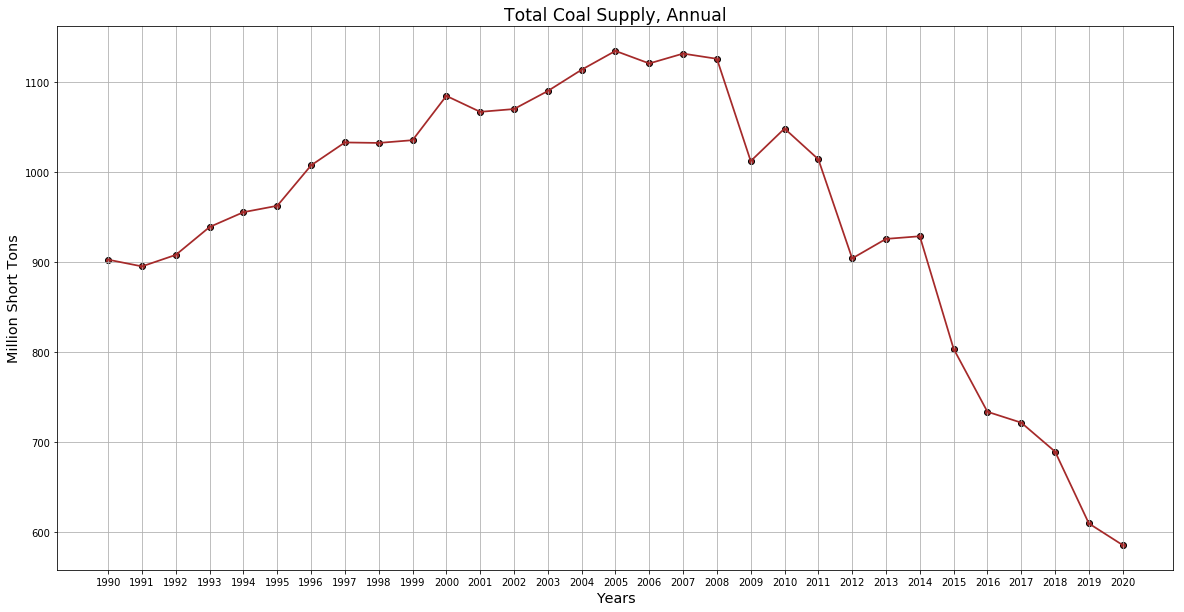

In [31]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, coal, color="brown", edgecolors="black")
plt.plot(years, coal, linewidth=1.75, color="brown")
plt.title("U.S. Total Coal Supply, Annual", fontsize="xx-large")
plt.ylabel("Million Short Tons", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Coal Consumption.png")

# display the figure
plt.show()

In [32]:
# Create Combined FossilFuel DataFrame using list of dictionaries method
fossilfuel_consumption_df = pd.DataFrame({
    'Year': years,
    'Petroleum (mmbpd)': petroleum,
    'Natural Gas (bcf/day)': natural_gas,
    'Coal (MMSt)': coal,
})
# Display DataFrame
fossilfuel_consumption_df.set_index("Year").head()

,Petroleum (mmbpd),Natural Gas (bcf/day),Coal (MMSt)
Year,,,
1990,16.989137,52.530288,902.768744
1991,16.713847,53.594703,895.303788
1992,17.032224,55.268382,908.113844
1993,17.236999,56.958472,939.165111
1994,17.718979,58.211229,955.626226


In [33]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_df.to_csv("resources/FossilFuelConsumption.csv", index=False, header=True)

In [34]:
# Normalize values for the different types of fossil fuels
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fossilfuel_consumption_normdf = pd.DataFrame(x_scaled, columns=['PetNorm', 'NatGasNorm', 'CoalNorm'])
fossilfuel_consumption_normdf.head()

,PetNorm,NatGasNorm,CoalNorm
0,0.063770,0.000000,0.577545
1,0.000000,0.034173,0.563969
2,0.073751,0.087905,0.587265
3,0.121187,0.142165,0.643734
4,0.232837,0.182384,0.673670


In [35]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_normdf.to_csv("resources/FossilFuelConsumptionNormValues.csv", index=False, header=True)

In [36]:
# Initialize variable for vertical line on multi-line graph to come
x_lim = 0.25 * np.pi
x_axis = np.arange(0, x_lim, 1.0)
sin = np.sin(x_axis)

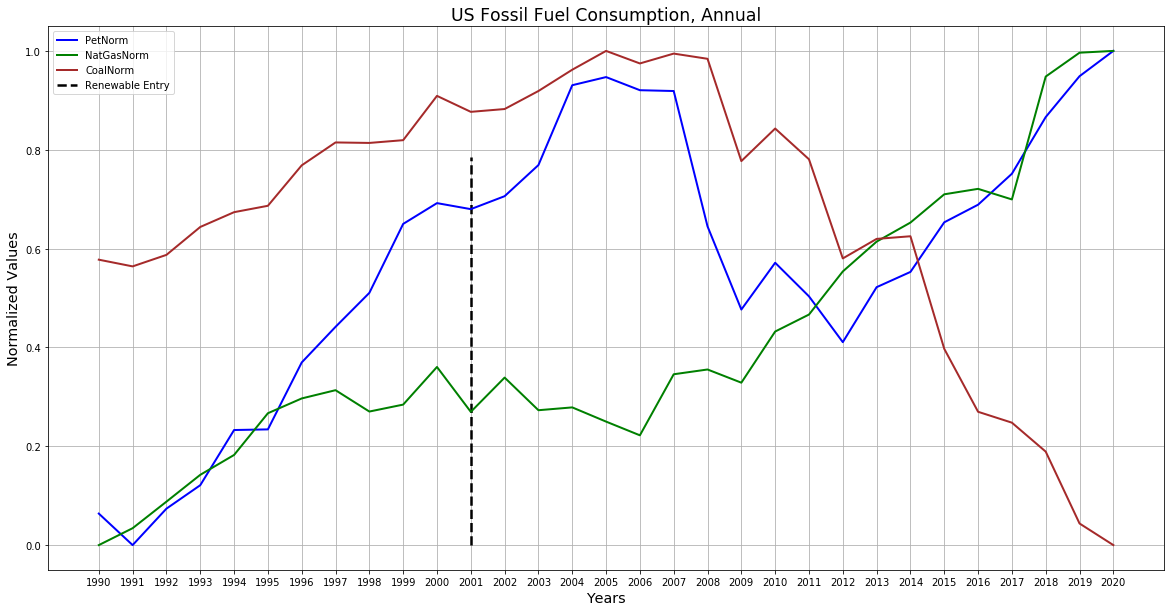

In [37]:
# US Fossil Fuel Consumption (1990 - Present)
plt.figure(figsize=(20,10))

# # Create a visual for the combined normalized fossil fuel data
plt.plot(years, fossilfuel_consumption_normdf['PetNorm'], color= "blue", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['NatGasNorm'], color ="green", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['CoalNorm'], color="brown", linewidth=2.0)
plt.title("US Fossil Fuel Consumption, Annual", fontsize="xx-large")
plt.ylabel("Normalized Values", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")

plt.grid(True)

#save figure as a png
plt.savefig("output/US Fossil Fuel Consumption.png")

# # Display line for when renewables began to take off, variable initialized in previous cell
plt.vlines(11, 0, x_lim, alpha=1.0, linestyles="--", label="Renewable Entry", linewidth=2.5, color="black")
plt.legend()

# display the figure
plt.show()
